## Семинар 8.

### Задание:
#### На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue. Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_excel("H:\Учёба\АВ тестирование\seminar8\AB_Test_Results (2).xlsx")
df

C:\Users\3x1080TI\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [3]:
df.shape

(10000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
df.isna().sum() #Подсчитаем NaN или пропущенные значения во фрейме данных 

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [6]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [7]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [8]:
df.USER_ID.nunique()  # количество уникальных значений

6324

In [15]:
df[df['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,2390.000000,2390.000000
mean,5020.881590,0.196887
std,2904.850992,4.172201
min,2.000000,0.000000
25%,2517.250000,0.000000
50%,5012.500000,0.000000
75%,7616.000000,0.000000
max,9998.000000,196.010000


In [9]:
df = df.groupby(['USER_ID', 'VARIANT_NAME']).agg({'REVENUE':'sum'})
df.reset_index(inplace=True)
df

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.00
1,3,control,0.00
2,3,variant,0.00
3,4,variant,0.00
4,5,variant,0.00
...,...,...,...
7860,9996,control,0.00
7861,9996,variant,6.46
7862,9998,control,0.00
7863,10000,control,0.00


In [10]:
df.drop_duplicates('USER_ID', keep=False, inplace=True)## Посчитаем, сколько типов встречается у каждого пользователя.
df

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
3,4,variant,0.0
4,5,variant,0.0
5,6,variant,0.0
6,9,variant,0.0
...,...,...,...
7856,9990,variant,0.0
7857,9992,control,0.0
7858,9993,control,0.0
7859,9995,variant,0.0


### Анализ данных

In [11]:
df.describe()

,USER_ID,REVENUE
count,4783.000000,4783.000000
mean,4994.395777,0.135873
std,2898.618472,3.011392
min,2.000000,0.000000
25%,2476.000000,0.000000
50%,4975.000000,0.000000
75%,7515.000000,0.000000
max,9998.000000,196.010000


In [19]:
control = df.query('VARIANT_NAME == "control"')

test = df.query('VARIANT_NAME == "variant"')
# print(f"Контрольная группа: {control.count()[0]} Тестовая группа: {test.count()[0]}")

In [20]:
len(control)

2390

In [21]:
len(test)

2393

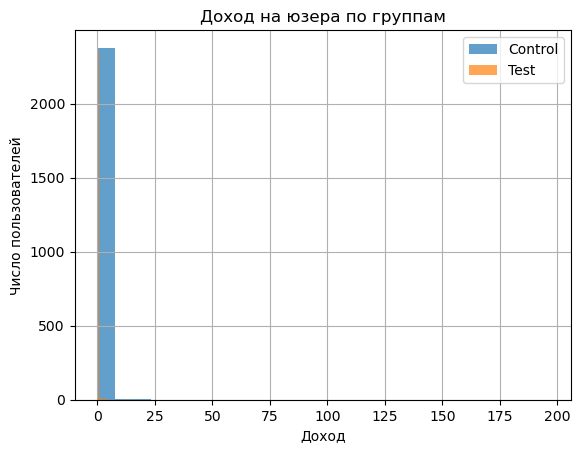

In [13]:
control.REVENUE.hist(bins = 25, alpha =0.7, label='Control')
test.REVENUE.hist(bins = 25, alpha =0.7, label='Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

In [14]:
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.3996978409515475, pvalue=0.16172355638776942)

### Статистически значимых различий в группах нет.